# Amplitude Scatter Plot

### Continuous plotting

<IPython.core.display.Javascript object>


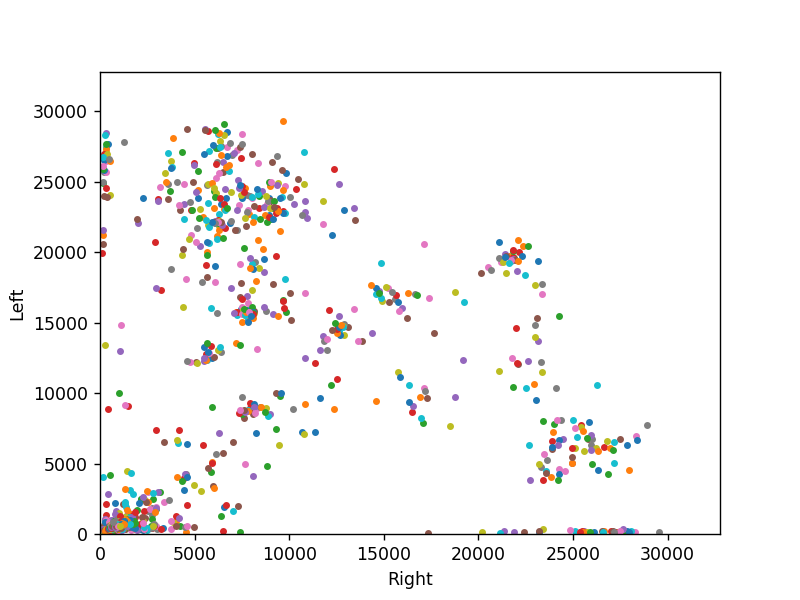

C:\Users\anura\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [4]:
# Date : 07.04.2020
# version : 1.0.200407
# > calculate the peak value of a CHUNK length window of the audio stream for each channel
# > Plot the values on the graph of Left channel vs. Right channel
# Disadvantage - without averaging data include a lot of noise

import pyaudio
import numpy as np
import keyboard
from matplotlib import pyplot as plt 
%matplotlib notebook

maxValue = 2**15  #since the audio ADC in 16bit resolution the max value is 2¹⁶
CHUNK = 1024
RATE = 44100
CHANNELS = 2
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True, 
                frames_per_buffer = CHUNK)

fig, ax = plt.subplots()
plt.axis([0, 2**15, 0, 2**15])
plt.xlabel("Right")
plt.ylabel("Left")

while True:
    data = np.fromstring(stream.read(CHUNK),dtype = np.int16)
    rawL = data[0::2]
    rawR = data[1::2]
    peakL = np.abs(np.max(rawL))
    peakR = np.abs(np.max(rawR))
    
#     peakL = np.abs(np.max(rawL)-np.min(rawL))
#     peakR = np.abs(np.max(rawR)-np.min(rawR))
    
    plot, = ax.plot(peakR, peakL, '.')
    fig.canvas.draw()
    fig.canvas.flush_events()   
     
    if keyboard.is_pressed('Esc'):  # Exit the loop by pressing 'Esc'
        stream.stop_stream()
        stream.close()
        p.terminate()
        break

### Continous Plotting (with Averaging)

<IPython.core.display.Javascript object>


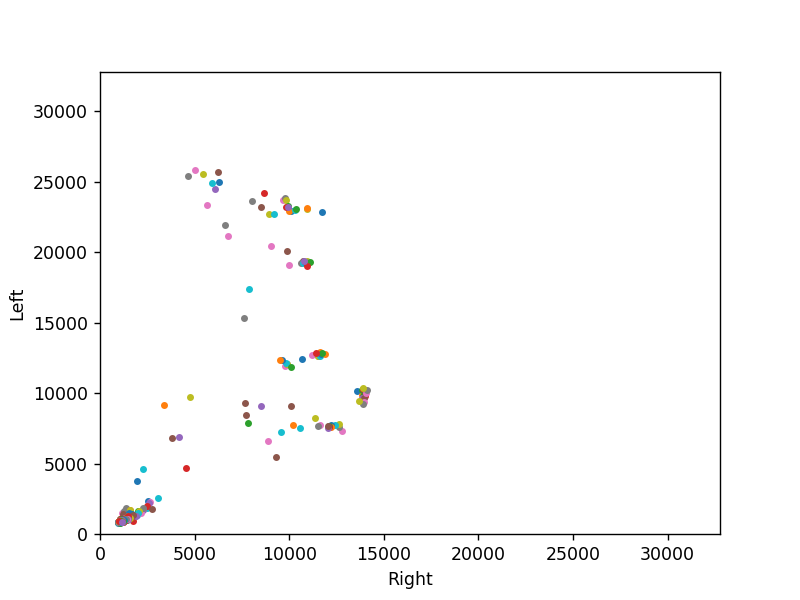

C:\Users\anura\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [8]:
# Advantage - tightly localized no random noise
# Disadvantage - not always collect 'count' data points in time result in lower values sometimes
# Potential fix - add button support and remove continuous plotting

import pyaudio
import numpy as np
import keyboard
from matplotlib import pyplot as plt 
%matplotlib notebook

CHUNK = 1024
RATE = 44100
CHANNELS = 2
FORMAT = pyaudio.paInt16

count = 10      # average count

p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True, 
                frames_per_buffer = CHUNK)

fig, ax = plt.subplots()
plt.axis([0, 2**15, 0, 2**15])
plt.xlabel("Right")
plt.ylabel("Left")

while True: 
    totL = totR = 0
    for i in range(count):
        data = np.fromstring(stream.read(CHUNK),dtype = np.int16)
        rawL = data[0::2]
        rawR = data[1::2]
        totL += np.abs(np.max(rawL))
        totR += np.abs(np.max(rawR))     
    
    peakL = totL/count
    peakR = totR/count
    
    plot, = ax.plot(peakR, peakL, '.')
    fig.canvas.draw()
    fig.canvas.flush_events()   
     
    if keyboard.is_pressed('Esc'):  # Exit the loop by pressing 'Esc'
        stream.stop_stream()
        stream.close()
        p.terminate()
        break

### Button assisted plotting using 'pymata'

In [ ]:
import pyaudio
import numpy as np
import time
import keyboard
from matplotlib import pyplot as plt 
from pymata4 import pymata4
%matplotlib notebook

DIGITAL_PIN = 2
TONE_PIN = 3

CHUNK = 1024
RATE = 44100
CHANNELS = 2
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True, 
                frames_per_buffer = CHUNK)

def the_callback(data):
    if data[2]:       # If the value of the button press is HIGH
        board.play_tone(TONE_PIN, 256, 1000)
        print('Tone executed')
        time.sleep(.1)
        print('Sleep executed')
        plot, = ax.plot(peakR, peakL, '.')
        fig.canvas.draw()
        fig.canvas.flush_events() 
        print('plot drawn')
        
fig, ax = plt.subplots()
plt.axis([0, 2**15, 0, 2**15])
plt.xlabel("Right")
plt.ylabel("Left")
        
board = pymata4.Pymata4()
board.set_pin_mode_tone(TONE_PIN)
board.set_pin_mode_digital_input(DIGITAL_PIN, callback = the_callback)


while True:
    data = np.fromstring(stream.read(CHUNK),dtype = np.int16)
    rawL = data[0::2]
    rawR = data[1::2]
    peakL = np.abs(np.max(rawL))
    peakR = np.abs(np.max(rawR))
      
    if keyboard.is_pressed('Esc'):  # Exit the loop by pressing 'Esc'
        stream.stop_stream()
        stream.close()
        p.terminate()
        board.shutdown()
        break

<IPython.core.display.Javascript object>

pymata4:  Version 1.01

Copyright (c) 2020 Alan Yorinks All Rights Reserved.

Opening all potential serial ports...
	COM14

Waiting 4 seconds(arduino_wait) for Arduino devices to reset...

Searching for an Arduino configured with an arduino_instance = 1
Arduino compatible device found and connected to COM14

Retrieving Arduino Firmware ID...


### Button assisted plotting using 'pymata'(with averaging)

<IPython.core.display.Javascript object>


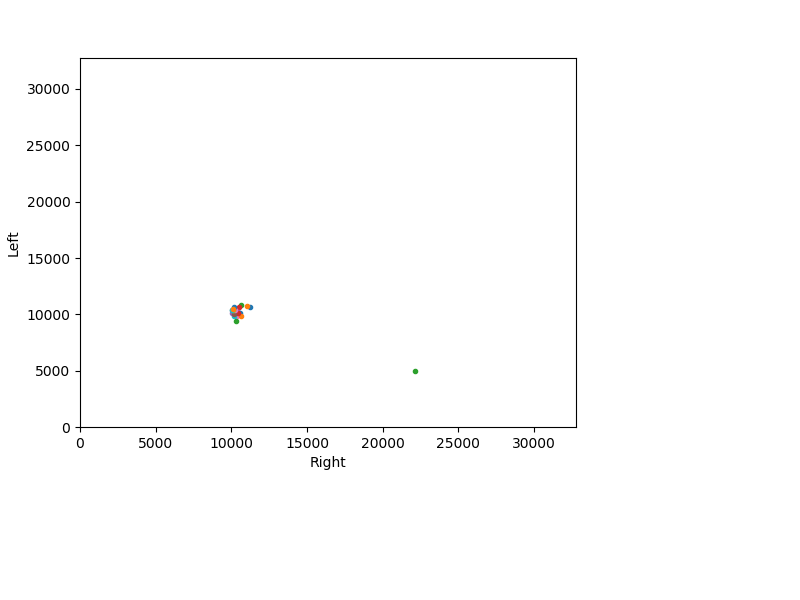

pymata4:  Version 1.01

Copyright (c) 2020 Alan Yorinks All Rights Reserved.

Opening all potential serial ports...
	COM14

Waiting 4 seconds(arduino_wait) for Arduino devices to reset...

Searching for an Arduino configured with an arduino_instance = 1
Arduino compatible device found and connected to COM14

Retrieving Arduino Firmware ID...
Arduino Firmware ID: 2.5 FirmataExpress.ino

Retrieving analog map...
Auto-discovery complete. Found 22 Digital Pins and 8 Analog Pins




C:\Users\anura\Anaconda3\envs\tensorflow_2\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


11230.5625 - 10680.8125
11047.375 - 10734.875
10641.0 - 10855.0
10487.3125 - 10647.75
10429.375 - 10251.8125
10226.0 - 10302.75
10345.8125 - 9862.75
10206.5625 - 10305.1875
10153.875 - 10256.625
10204.5625 - 9887.9375
10582.0 - 10117.375
10634.75 - 9837.5625
10308.375 - 9446.5
10439.6875 - 10089.125
10052.625 - 10128.75
10160.0 - 10038.25
10241.125 - 10408.9375
10033.625 - 10430.4375
10109.5625 - 10366.625
10026.5 - 10366.4375
10202.3125 - 10641.8125
10087.3125 - 10504.5
22126.75 - 5016.9375


In [1]:
# The speed ~ 10 radings/second
# optimally count = 8 is enough for 500ms pulse

import pyaudio
import numpy as np
import time
import keyboard
from matplotlib import pyplot as plt 
from pymata4 import pymata4
%matplotlib notebook

DIGITAL_PIN = 2
TONE_PIN = 3

count = 21

CHUNK = 1024
RATE = 44100
CHANNELS = 2
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True, 
                frames_per_buffer = CHUNK)

def the_callback(data):
    if data[2]:                                 # If the value of the button press is HIGH
        maxL = []
        maxR = []
        board.play_tone(TONE_PIN, 256, 1000)
        for i in range(count):
            data = np.fromstring(stream.read(CHUNK),dtype = np.int16)
            rawL = data[0::2]
            rawR = data[1::2]
            #print(np.abs(np.max(rawL)),'-',np.abs(np.max(rawR)))
            maxL.append(np.abs(np.max(rawL)))
            maxR.append(np.abs(np.max(rawR)))
        #print('-------------')    
        left = np.average(maxL[5:])             # Average by removing the first 5 indicies
        right = np.average(maxR[5:])  
        #print(left,'-',right)
        plot, = ax.plot(right, left, '.')
        fig.canvas.draw()
        fig.canvas.flush_events() 
        
fig, ax = plt.subplots()
plt.axis([0, 2**15, 0, 2**15])
plt.xlabel("Right")
plt.ylabel("Left")
        
board = pymata4.Pymata4()
board.set_pin_mode_tone(TONE_PIN)
board.set_pin_mode_digital_input(DIGITAL_PIN, callback = the_callback)

while True:
    if keyboard.is_pressed('Esc'):              # Exit the loop by pressing 'Esc'
        stream.stop_stream()
        stream.close()
        p.terminate()
        board.shutdown()
        break